<a href="https://www.kaggle.com/code/yarikarshadmir/rgb-color?scriptVersionId=165898497" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Load images as NumPy arrays

In [1]:
import os
import numpy as np
from PIL import Image

def load_color_imgs(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith("jpeg"):
            
            image = Image.open(os.path.join(directory, filename))
            
            image_resized = image.resize((640, 640))
            
            image_array = np.array(image_resized)
            images.append(image_array)
    return np.array(images)

def load_grey_imgs(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png")  or filename.endswith("jpeg"):

            image = Image.open(os.path.join(directory, filename))

            image_grey = image.convert('L')

            image_resized = image_grey.resize((640, 640))

            image_array = np.array(image_resized)

            image_array = np.expand_dims(image_array, axis=-1)
            images.append(image_array)
    return np.array(images)

In [2]:
color_directory = "/kaggle/input/images/Color"
grey_directory = "/kaggle/input/images/Grey"

color = load_color_imgs(color_directory)
grey = load_grey_imgs(grey_directory)

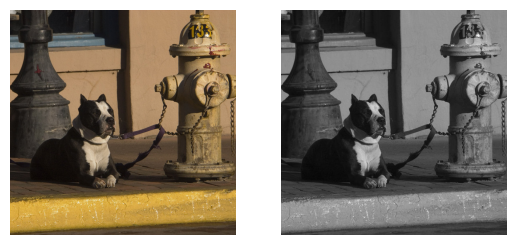

In [3]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1) 
plt.imshow(color[0].astype('uint8'))
plt.axis('off')  

plt.subplot(1, 2, 2)
plt.imshow(grey[0].astype('uint8'), cmap='gray')
plt.axis('off')  

plt.show()

In [4]:
color.shape, grey.shape

((54, 640, 640, 3), (54, 640, 640, 1))

In [5]:
## IGNORE --- Used validation_split in .fit() instead
'''
X_train = color[0:35]
Y_train = grey[0:35]

X_test = color[35:]
Y_test = color[35:]

X_train.shape, X_test.shape
'''

'\nX_train = color[0:35]\nY_train = grey[0:35]\n\nX_test = color[35:]\nY_test = color[35:]\n\nX_train.shape, X_test.shape\n'

# Model

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.optimizers import Adam

def create_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, kernel_size=1, padding='same', activation='relu'),
        Conv2DTranspose(1, kernel_size=1, padding='same', activation='linear')
    ])
    return model


input_shape = (640, 640, 3)
model = create_model(input_shape)


opt = Adam(learning_rate = 0.0002, beta_1 = 0.5)
model.compile(optimizer= opt, loss='mse')

model.summary()


2024-03-07 16:14:10.317908: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 16:14:10.318008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 16:14:10.432172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 640, 640, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 640, 640, 1)    │            33 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

# Train

In [7]:
img_shape = color[0].shape
img_shape

(640, 640, 3)

Epoch 1/5
20/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12540.9004

I0000 00:00:1709828064.612975      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 12454.3613 - val_loss: 10983.8779
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10554.2559 - val_loss: 9170.6748
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8187.6792 - val_loss: 7583.4590
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6750.2817 - val_loss: 6200.8618
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6007.3711 - val_loss: 5002.3281


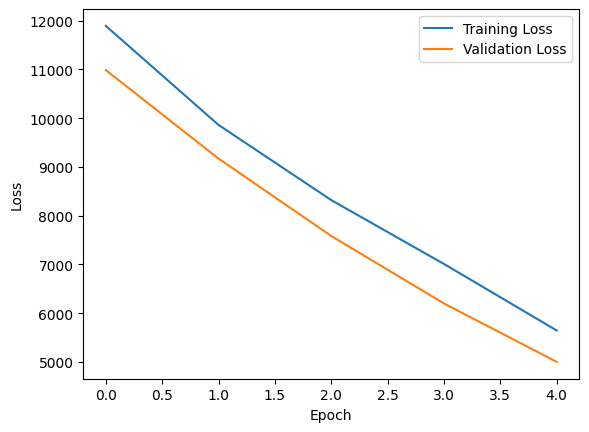

In [8]:
history = model.fit(color, grey, batch_size=2, epochs=5, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions

In [9]:
color_test = load_color_imgs("/kaggle/input/burger/")

In [10]:
color_test.shape

(1, 640, 640, 3)

In [11]:
color_test_batch = color_test.reshape(1, 640, 640, 3)

predicted_grey_single = model.predict(color_test_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [12]:
def plot_pred(colored, greyscale):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(colored.astype('uint8'), cmap = 'Greys_r')
    plt.title('Original Colored Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(greyscale.astype('uint8'), cmap = 'Greys_r')
    plt.title('Predicted Grayscale Image')
    plt.axis('off')

    plt.show()

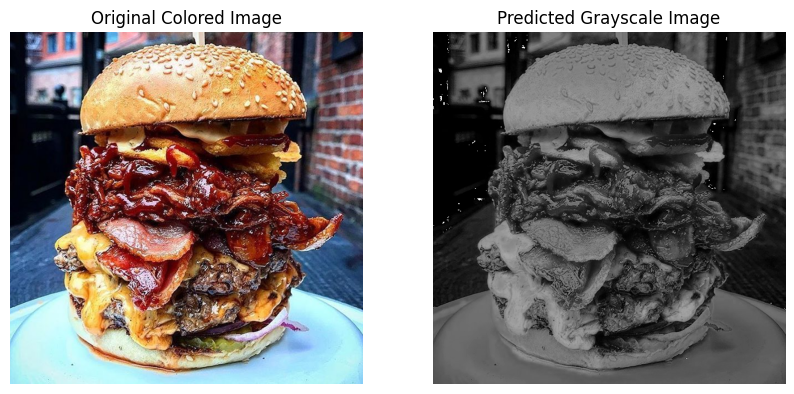

In [13]:
colored = color_test[0]
greyscale = predicted_grey_single[0]
plot_pred(colored, greyscale)

In [14]:
predicted_grey_single[0].shape

(640, 640, 1)

In [15]:
from PIL import Image

def save_gray_image_as_jpeg(image_array, file_path):
    image_array = image_array.astype('uint8')
    
    image = Image.fromarray(image_array.squeeze(), mode='L')
    
    image.save(file_path, format='JPEG')

gray_image_array = predicted_grey_single[0]
save_gray_image_as_jpeg(gray_image_array, "/kaggle/working/image.jpg")
